## Preprocessing

Imporing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")
test_fe = pd.read_csv("test_image_features.csv")
train_fe = pd.read_csv("train_image_features.csv")

In [4]:
pd.set_option("display.max_columns", None)

In [5]:
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,times_priced
0,9117000170,2015-05-05,268643,4,2.25,1810,9240,2.0,0,0,3,7,1810,0,1961,0,98055,47.4362,-122.187,1660,9240,0
1,6700390210,2014-07-08,245000,3,2.50,1600,2788,2.0,0,0,4,7,1600,0,1992,0,98031,47.4034,-122.187,1720,3605,0
2,7212660540,2015-01-15,200000,4,2.50,1720,8638,2.0,0,0,3,8,1720,0,1994,0,98003,47.2704,-122.313,1870,7455,0
3,8562780200,2015-04-27,352499,2,2.25,1240,705,2.0,0,0,3,7,1150,90,2009,0,98027,47.5321,-122.073,1240,750,0
4,7760400350,2014-12-05,232000,3,2.00,1280,13356,1.0,0,0,3,7,1280,0,1994,0,98042,47.3715,-122.074,1590,8071,0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16209 entries, 0 to 16208
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16209 non-null  int64  
 1   date           16209 non-null  object 
 2   price          16209 non-null  int64  
 3   bedrooms       16209 non-null  int64  
 4   bathrooms      16209 non-null  float64
 5   sqft_living    16209 non-null  int64  
 6   sqft_lot       16209 non-null  int64  
 7   floors         16209 non-null  float64
 8   waterfront     16209 non-null  int64  
 9   view           16209 non-null  int64  
 10  condition      16209 non-null  int64  
 11  grade          16209 non-null  int64  
 12  sqft_above     16209 non-null  int64  
 13  sqft_basement  16209 non-null  int64  
 14  yr_built       16209 non-null  int64  
 15  yr_renovated   16209 non-null  int64  
 16  zipcode        16209 non-null  int64  
 17  lat            16209 non-null  float64
 18  long  

No Null Values Found

In [ ]:
train.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,times_priced
count,1.620900e+04,1.620900e+04,16209.00000,16209.000000,16209.000000,1.620900e+04,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000
mean,4.575771e+09,5.374703e+05,3.36782,2.113054,2073.274601,1.486767e+04,1.498828,0.006971,0.234253,3.407860,7.652971,1784.754396,288.520205,1971.152755,82.738108,98077.974767,47.560707,-122.214003,1983.152261,12735.572707,0.018323
std,2.874661e+09,3.603036e+05,0.93327,0.765242,907.009491,3.882570e+04,0.543032,0.083206,0.763152,0.651553,1.171050,821.820844,438.598910,29.372698,397.861148,53.355282,0.138340,0.140093,681.905161,26933.162012,0.173795
min,1.000102e+06,7.500000e+04,0.00000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.159300,-122.519000,399.000000,651.000000,0.000000
25%,2.123049e+09,3.200000e+05,3.00000,1.500000,1430.000000,5.004000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.472500,-122.328000,1480.000000,5098.000000,0.000000
50%,3.904950e+09,4.500000e+05,3.00000,2.250000,1910.000000,7.599000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572400,-122.230000,1840.000000,7620.000000,0.000000
75%,7.304301e+09,6.400000e+05,4.00000,2.500000,2550.000000,1.063100e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2200.000000,560.000000,1997.000000,0.000000,98117.000000,47.678200,-122.125000,2360.000000,10053.000000,0.000000
max,9.900000e+09,7.700000e+06,33.00000,8.000000,12050.000000,1.164794e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8860.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2.000000


In [8]:
test.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,times_priced
0,2591820310,2014-10-06,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,0
1,7974200820,2014-08-21,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,0
2,7701450110,2014-08-15,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,0
3,9522300010,2015-03-31,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,0
4,9510861140,2014-07-14,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,0


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5404 entries, 0 to 5403
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             5404 non-null   int64  
 1   date           5404 non-null   object 
 2   bedrooms       5404 non-null   int64  
 3   bathrooms      5404 non-null   float64
 4   sqft_living    5404 non-null   int64  
 5   sqft_lot       5404 non-null   int64  
 6   floors         5404 non-null   float64
 7   waterfront     5404 non-null   int64  
 8   view           5404 non-null   int64  
 9   condition      5404 non-null   int64  
 10  grade          5404 non-null   int64  
 11  sqft_above     5404 non-null   int64  
 12  sqft_basement  5404 non-null   int64  
 13  yr_built       5404 non-null   int64  
 14  yr_renovated   5404 non-null   int64  
 15  zipcode        5404 non-null   int64  
 16  lat            5404 non-null   float64
 17  long           5404 non-null   float64
 18  sqft_liv

In [10]:
train["date"] = pd.to_datetime(train["date"], errors="coerce")
test["date"]  = pd.to_datetime(test["date"], errors="coerce")

In [12]:
print(train["id"].duplicated().sum())
print(test["id"].duplicated().sum())

99
8


In [ ]:
train = train.sort_values(["id", "date"])

# assign sequence within each id
train["times_priced"] = train.groupby("id").cumcount() + 1

# convert single occurrences → 0
counts = train["id"].value_counts()
train.loc[train["id"].map(counts) == 1, "times_priced"] = 0

In [ ]:
test = test.sort_values(["id", "date"])

test["times_priced"] = test.groupby("id").cumcount() + 1

counts_test = test["id"].value_counts()
test.loc[test["id"].map(counts_test) == 1, "times_priced"] = 0

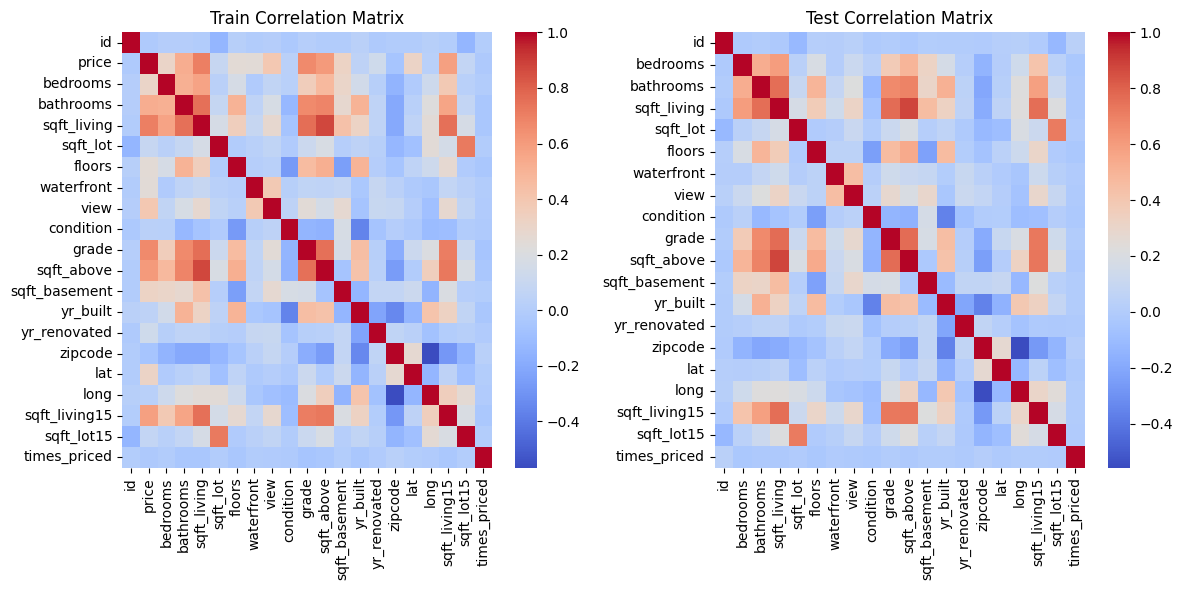

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# numeric-only correlations
train_corr = train.select_dtypes(include=[np.number]).corr()
test_corr  = test.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(12,6))

# ---- Train ----
plt.subplot(1,2,1)
sns.heatmap(train_corr, cmap="coolwarm", annot=False)
plt.title("Train Correlation Matrix")

# ---- Test ----
plt.subplot(1,2,2)
sns.heatmap(test_corr, cmap="coolwarm", annot=False)
plt.title("Test Correlation Matrix")

plt.tight_layout()
plt.show()


##### Price Histogram (Log- Transformation)

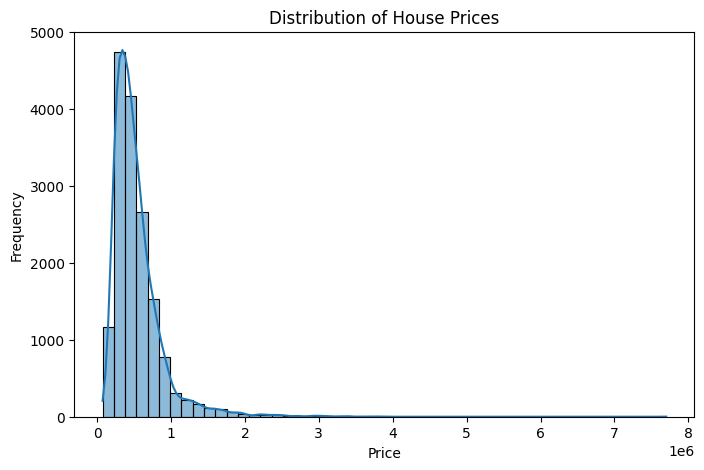

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(train["price"], bins=50, kde=True)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Distribution of House Prices")
plt.show()


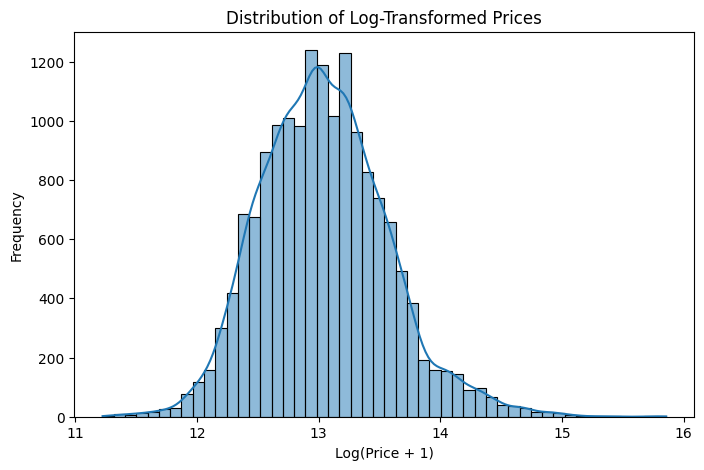

In [19]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

log_price = np.log1p(train["price"])

plt.figure(figsize=(8,5))
sns.histplot(log_price, bins=50, kde=True)
plt.xlabel("Log(Price + 1)")
plt.ylabel("Frequency")
plt.title("Distribution of Log-Transformed Prices")
plt.show()

##### Price vs Living Area (sqft)


Text(0.5, 1.0, 'Price vs Living Area')

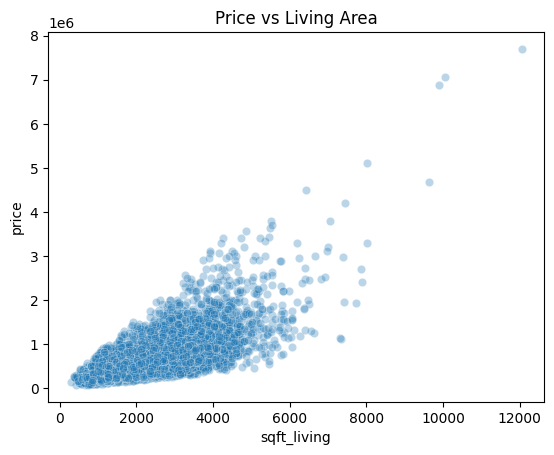

In [ ]:
sns.scatterplot(x=train["sqft_living"], y=train["price"], alpha=0.3)
plt.title("Price vs Living Area")

##### Impact of Waterfront View on House Prices

Text(0.5, 1.0, 'Waterfront Effect on Price')

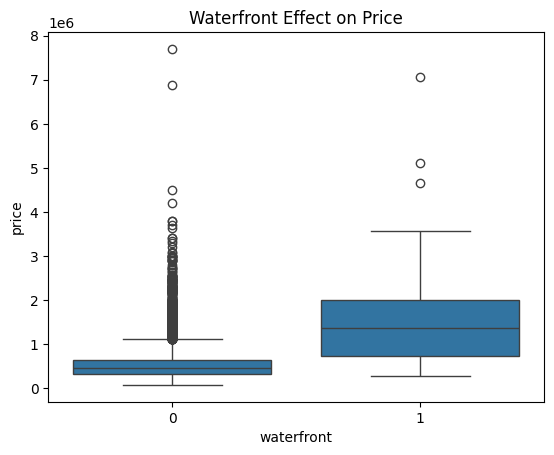

In [22]:
sns.boxplot(x=train["waterfront"], y=train["price"])
plt.title("Waterfront Effect on Price")

##### Outliers in Living Area (sqft_living)

Text(0.5, 1.0, 'Outliers in Living Area')

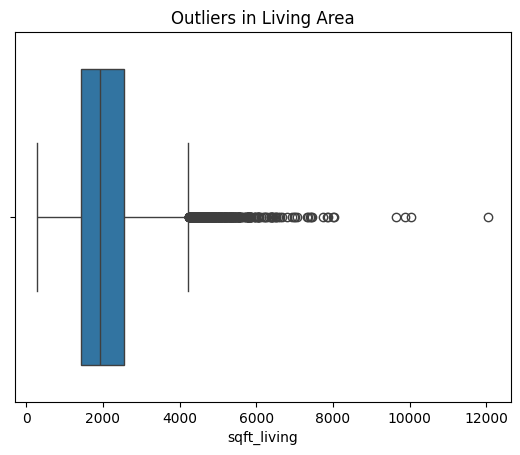

In [ ]:
sns.boxplot(x=train["sqft_living"])
plt.title("Outliers in Living Area")

##### Outliers in House Prices

Text(0.5, 1.0, 'Price Outliers')

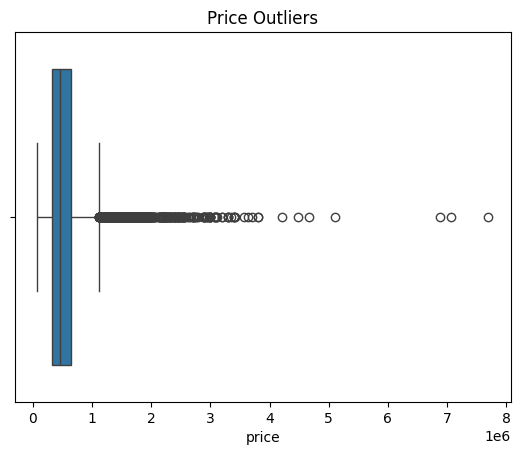

In [24]:
sns.boxplot(x=train["price"])
plt.title("Price Outliers")

##### Distribution of Living Area (sqft_living)

Text(0.5, 1.0, 'Distribution of Living Area')

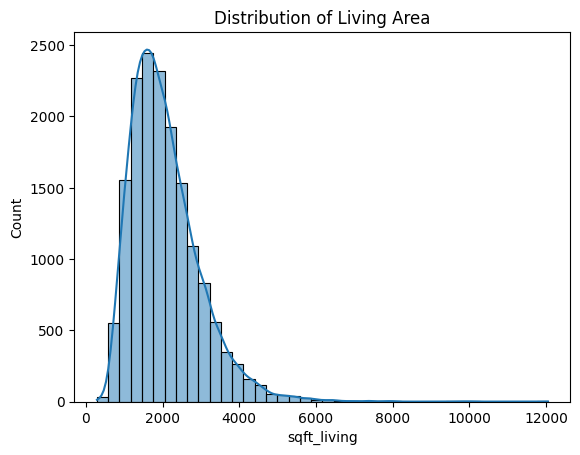

In [28]:
sns.histplot(train["sqft_living"], bins=40, kde=True)
plt.title("Distribution of Living Area")

##### Price Comparison: Renovated vs Non-Renovated Homes

Text(0.5, 1.0, 'Price Difference: Renovated vs Not Renovated')

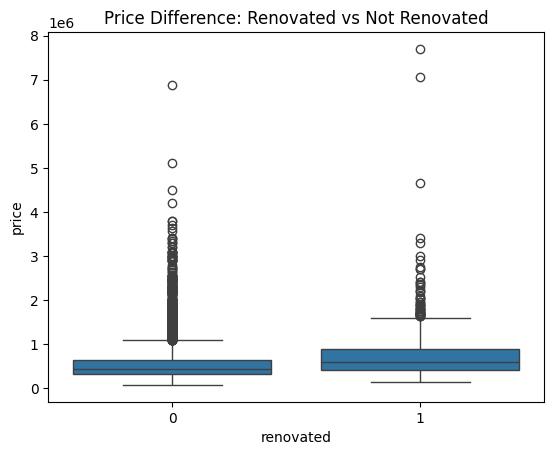

In [32]:
train["renovated"] = (train["yr_renovated"] > 0).astype(int)

sns.boxplot(x="renovated", y="price", data=train)
plt.title("Price Difference: Renovated vs Not Renovated")

##### Price Variation Across Property Condition Levels

Text(0.5, 1.0, 'Price vs Condition')

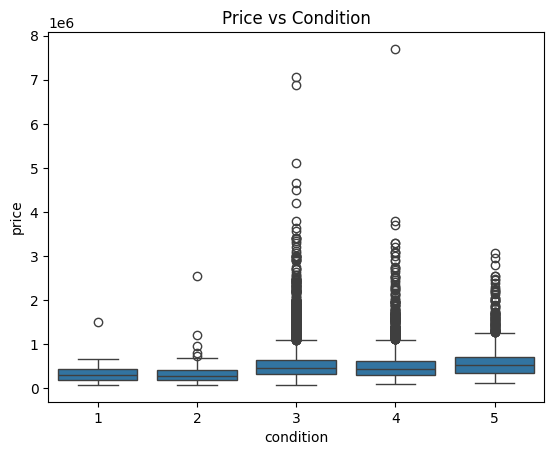

In [33]:
sns.boxplot(x="condition", y="price", data=train)
plt.title("Price vs Condition")

##### Interaction Between Living Area and Grade on Price

Text(0.5, 1.0, 'Interaction: Size vs Grade on Price')

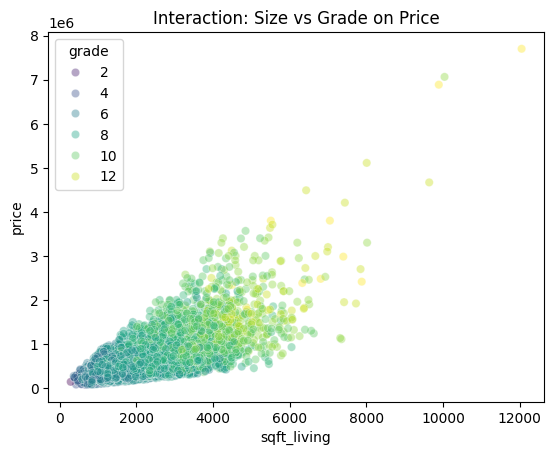

In [34]:
sns.scatterplot(
    x=train["sqft_living"],
    y=train["price"],
    hue=train["grade"],
    alpha=0.4,
    palette="viridis"
)
plt.title("Interaction: Size vs Grade on Price")


##### Price vs Year Built


Text(0.5, 1.0, 'Price vs Year Built')

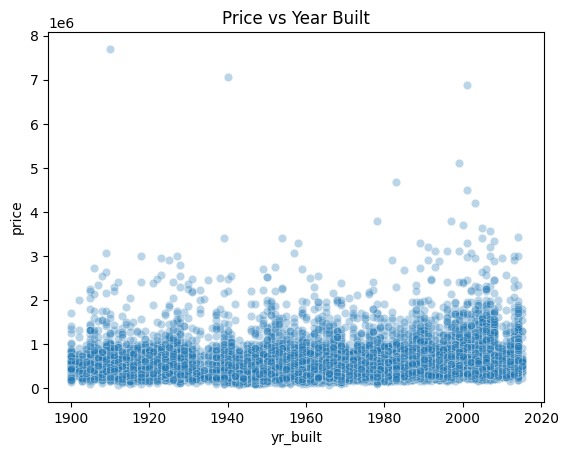

In [39]:
sns.scatterplot(x=train["yr_built"], y=train["price"], alpha=0.3)
plt.title("Price vs Year Built")

##### Price vs Number of Floors

Text(0.5, 1.0, 'Price vs Number of Floors')

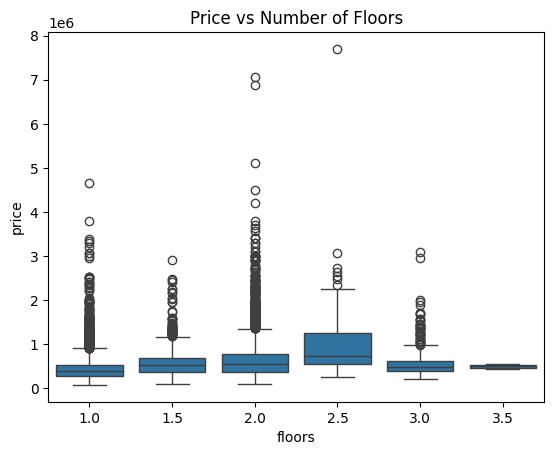

In [42]:
sns.boxplot(x="floors", y="price", data=train)
plt.title("Price vs Number of Floors")

##### Price Distribution by Zipcode

Text(0.5, 1.0, 'Price Distribution by Zipcode')

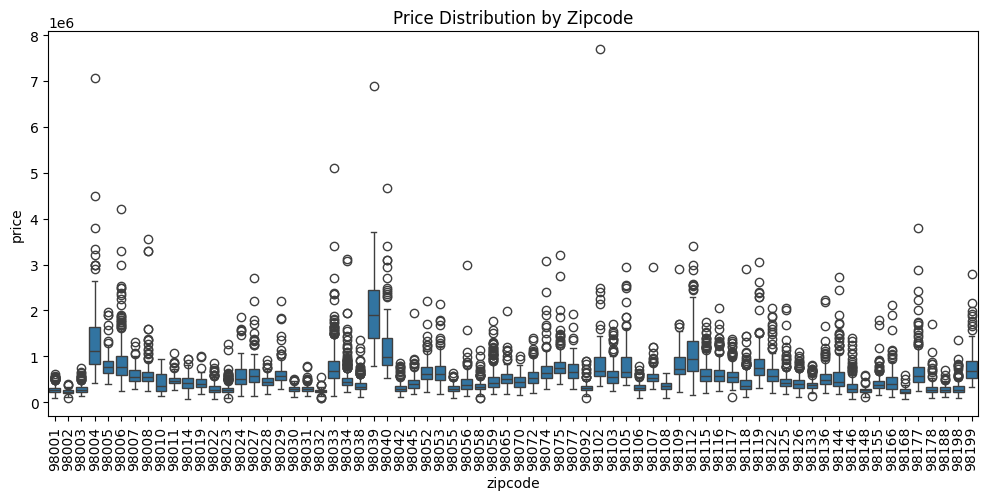

In [46]:
plt.figure(figsize=(12,5))
sns.boxplot(x=train["zipcode"], y=train["price"])
plt.xticks(rotation=90)
plt.title("Price Distribution by Zipcode")

##### Bedroom Density vs Price

Text(0.5, 1.0, 'Bedroom Density vs Price')

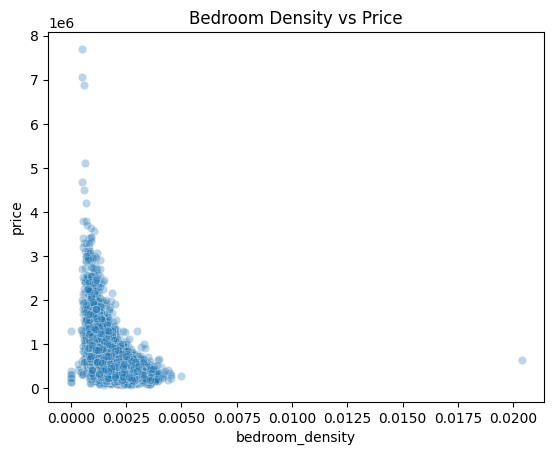

In [51]:
train["bedroom_density"] = train["bedrooms"] / train["sqft_living"]

sns.scatterplot(x=train["bedroom_density"], y=train["price"], alpha=0.3)
plt.title("Bedroom Density vs Price")

##### Average Price by Region Cluster

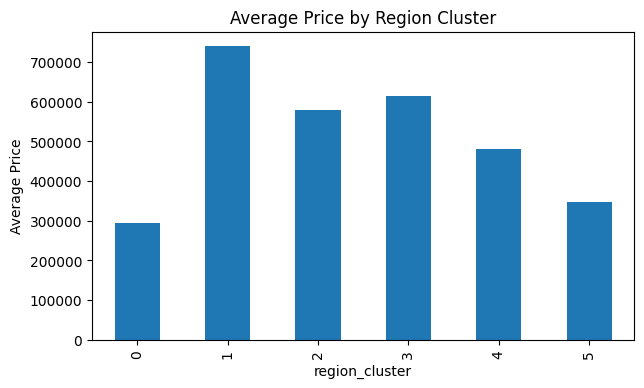

In [58]:
cluster_price = train.groupby("region_cluster")["price"].mean()

cluster_price.plot(kind="bar", figsize=(7,4))
plt.ylabel("Average Price")
plt.title("Average Price by Region Cluster")
plt.show()


#### Extracted Features from Images

In [67]:
train_fe.head()

0         1         2         3         4         5         6  \
0  0.063956  0.124507 -0.047171 -0.166595 -0.032263 -0.018367  0.014357   
1  0.217264  0.195637  0.228715 -0.185213 -0.056003 -0.091588 -0.103132   
2 -0.007968  0.151345  0.123488 -0.206935  0.110490 -0.148574 -0.065530   
3  0.266572  0.228906  0.065364 -0.201281 -0.052620 -0.100968 -0.010699   
4  0.045610  0.246433  0.159013 -0.160705 -0.100217 -0.017630 -0.020712   

          7         8         9        10        11        12        13  \
0  0.036748 -0.024116  0.015283 -0.106978  0.289802  0.001134  0.455672   
1  0.229704  0.004099  0.257945  0.059435  0.076585  0.529348  0.491587   
2  0.002444  0.125665  0.178986 -0.090475  0.264706  0.241118  0.192329   
3 -0.014176  0.122664  0.160546  0.049094  0.122709  0.074892  0.359637   
4  0.016349  0.016142  0.110430  0.289139 -0.034983  0.174632  0.623078   

         14        15        16        17        18        19        20  \
0 -0.203808  0.036978  0.172655  0.624942 -0.067523  0.025331  0.005649   
1 -0.109746 -0.005732  0.056238  0.271333  0.094637  0.045462  0.082843   
2 -0.211151 -0.052542 -0.055601  0.157098  0.186292  0.082028  0.003248   
3 -0.188939  0.017245  0.088580  0.422562 -0.105486  0.224342 -0.068134   
4 -0.103432 -0.005473 -0.013279  0.180903  0.281704  0.225921 -0.002330   

         21        22        23        24        25        26        27  \
0 -0.084409  0.026067  0.180492 -0.009635  0.298518 -0.036405  0.263066   
1  0.069704  0.169095  0.505605  0.061919  0.113344 -0.091888  0.129952   
2 -0.052225  0.044461  0.436064 -0.019449  0.317408 -0.084156  0.354303   
3  0.006773  0.050736  0.203881 -0.039367  0.101160 -0.098937  0.104913   
4 -0.024914 -0.086348  0.123899  0.337638  0.286907 -0.013654  0.537686   

         28        29        30        31        32        33        34  \
0 -0.137610  0.166340  0.055592  0.033315  0.109843 -0.115669 -0.155081   
1 -0.134528  0.218249  0.049082 -0.024820  0.014190  0.018013 -0.186991   
2 -0.139558  0.211350  0.183221  0.174989 -0.165921 -0.162688 -0.113176   
3 -0.125450 -0.075123  0.037495  0.088417  0.110291 -0.116297 -0.162424   
4 -0.195917  0.035066  0.228247 -0.067403  0.009194  0.185988 -0.216754   

         35        36        37        38        39        40        41  \
0 -0.155043  0.193020 -0.094010 -0.064613 -0.055162 -0.108901  0.007391   
1 -0.113098 -0.105403 -0.044298 -0.059314  0.043372 -0.038319  0.079492   
2 -0.033872 -0.081552 -0.047757  0.233019 -0.010243 -0.097908  0.063428   
3 -0.123382  0.119906 -0.091141 -0.008301 -0.071099 -0.119814  0.076504   
4  0.039267  0.028076 -0.029286  0.009018  0.273971 -0.160564  0.174841   

         42        43        44        45        46        47        48  \
0  0.153145  0.093321  0.036143 -0.215940 -0.150470 -0.174767 -0.019950   
1 -0.055168  0.097191 -0.036588 -0.038909 -0.168172 -0.176129 -0.029626   
2 -0.128869  0.164182 -0.127996 -0.206410 -0.158525 -0.119184 -0.050136   
3 -0.030246 -0.083978  0.027742 -0.194020 -0.118365 -0.141221 -0.071045   
4  0.224847  0.052109  0.133541 -0.185628 -0.079487 -0.067126 -0.064729   

         49        50        51        52        53        54        55  \
0 -0.079460  0.175726  0.109430 -0.136409 -0.138894 -0.123427  0.495825   
1  0.200081 -0.105997  0.093319 -0.145015  0.017968 -0.155591  0.161922   
2  0.399150  0.026031  0.000287 -0.132737 -0.219212 -0.172355 -0.020712   
3 -0.052871  0.224364  0.120227 -0.165367 -0.150810 -0.130689  0.308719   
4  0.021775  0.068263  0.431445 -0.175410 -0.082912 -0.100684  0.406331   

         56        57        58        59        60        61        62  \
0 -0.036119 -0.137738 -0.133596 -0.011443  0.043321  0.583291  0.022629   
1 -0.114235 -0.050756 -0.117004  0.189430  0.055554  0.049690  0.056450   
2 -0.088507 -0.045932 -0.090949 -0.050391  0.003843 -0.089360 -0.087489   
3 -0.066387 -0.081512 -0.089797  0.107244  0.080173  0.157230  0.070424   
4  0.044127 -0.114218 -0.12

In [68]:
test_fe.head()

0         1         2         3         4         5         6  \
0  0.010346  0.005331  0.367353 -0.140115 -0.199248 -0.103202 -0.202781   
1  0.160740  0.130965  0.056553 -0.203302 -0.073600 -0.045328 -0.027404   
2  0.035918  0.060613  0.247986 -0.207725 -0.074980  0.001754 -0.118750   
3  0.081681  0.012733  0.140057 -0.151011  0.244626 -0.054242 -0.123129   
4  0.378296  0.039196  0.144753 -0.197420  0.108042 -0.129783 -0.103169   

          7         8         9        10        11        12        13  \
0 -0.129967 -0.135987 -0.080807  0.010002 -0.151535  0.345759  0.296907   
1 -0.027186  0.054868  0.089104  0.067599  0.401469  0.101451  0.367482   
2  0.031558 -0.015354 -0.038582  0.146847  0.137967  0.285174  0.213190   
3 -0.093152  0.054039  0.191476  0.089129  0.417868  0.169512  0.360283   
4 -0.039115 -0.043385 -0.060987  0.024565  0.303404  0.052877  0.369634   

         14        15        16        17        18        19        20  \
0 -0.138846 -0.050564  0.071412  0.279836 -0.074339  0.066311 -0.078529   
1 -0.197891  0.211779  0.032043  0.467497  0.122299  0.242063 -0.000118   
2 -0.130039 -0.021096  0.053958  0.612992  0.043125  0.226830 -0.077595   
3 -0.137505 -0.007266 -0.111527  0.205770  0.063748  0.031566 -0.094515   
4 -0.181077  0.172734  0.092672  0.145595  0.010716  0.115147  0.191678   

         21        22        23        24        25        26        27  \
0 -0.014790 -0.155048  0.186875  0.300588 -0.042918  0.078486  0.817880   
1 -0.023875 -0.070239  0.075477  0.087348  0.237846 -0.099342  0.377431   
2  0.006896 -0.000960  0.424788  0.223940 -0.064690 -0.125333  0.399407   
3  0.055212 -0.022102  0.527215  0.052323  0.043896 -0.172327  0.087751   
4  0.063993  0.082855  0.103728 -0.078440 -0.067814 -0.240384  0.074587   

         28        29        30        31        32        33        34  \
0 -0.064275  0.356032  0.197446  0.098995 -0.045585 -0.090680 -0.209351   
1 -0.101249 -0.029154  0.084653  0.048629  0.053773 -0.049806 -0.141718   
2 -0.175848  0.206288  0.368301  0.036142 -0.031554  0.005716 -0.149765   
3 -0.107139  0.177221  0.035475  0.156092  0.019574 -0.044237 -0.123515   
4 -0.041551 -0.015170  0.003778  0.115737  0.003607 -0.136617 -0.081595   

         35        36        37        38        39        40        41  \
0 -0.030495 -0.050637 -0.199064 -0.059993 -0.157224 -0.054034  0.093296   
1 -0.127673  0.062541 -0.069140  0.068786 -0.174179 -0.168787 -0.106903   
2  0.015640 -0.067841 -0.104341  0.021018 -0.126098 -0.079144 -0.114056   
3  0.003653  0.166402 -0.066563  0.132039 -0.111672 -0.009533 -0.045423   
4 -0.054783 -0.075878 -0.117101 -0.002842 -0.130969 -0.057274 -0.189947   

         42        43        44        45        46        47        48  \
0 -0.071905 -0.024482  0.021220 -0.191655 -0.220801 -0.167139  0.014335   
1 -0.031120  0.040935 -0.046452 -0.216427 -0.155940 -0.140700 -0.085832   
2 -0.147572  0.162034  0.003985 -0.212800 -0.075603 -0.104755 -0.080669   
3 -0.145877  0.071592 -0.064584 -0.153369 -0.039412 -0.117035 -0.025061   
4 -0.029112 -0.034794 -0.143494 -0.170810 -0.129026 -0.173608 -0.094462   

         49        50        51        52        53        54        55  \
0  0.481256 -0.125604  0.278982 -0.132721 -0.141219 -0.157702  0.137879   
1  0.065009  0.258178  0.151962 -0.141244 -0.154307 -0.128152  0.521443   
2  0.073572 -0.045189  0.154054 -0.166202  0.026962 -0.173052  0.281182   
3  0.238714 -0.047451  0.198707 -0.085287 -0.072947 -0.125885  0.313465   
4  0.067737  0.061523  0.044834 -0.184439 -0.131069 -0.111818  0.361240   

         56        57        58        59        60        61        62  \
0 -0.147186 -0.090134 -0.176080 -0.014243 -0.040454 -0.037048 -0.145772   
1  0.049558 -0.092335 -0.143471  0.146734 -0.002657  0.168502  0.115049   
2 -0.112020 -0.162819 -0.144893  0.037266 -0.028988  0.198566 -0.011268   
3 -0.015319  0.017221 -0.222177  0.089339 -0.024810 -0.001949 -0.021582   
4 -0.016193 -0.204739 -0.02